Cтворити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import keras as k
import tensorflow as tf

from keras.optimizers import RMSprop, Adam

In [26]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [15]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()

    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [16]:
word_index = k.datasets.imdb.get_word_index()
inverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def get_readable_text(array_index_word: np.array) -> str:
    return ' '.join([inverse_word_index.get(word_index - 3 , '') for word_index in array_index_word]).strip()

In [17]:
get_readable_text(x_train[0])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

In [28]:
models = {}
result_models = {}

from tqdm.keras import TqdmCallback


In [37]:
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test)

    print(f"Model {model.name} Test accuracy:  {test_acc}")

    result_models[model.name] = test_acc

MODEL RNN

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense

In [30]:


# model =Sequential()
# # Створення порожньої моделі Sequential

# # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# model.add(Embedding(max_features, 32))
# # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# # Додавання LSTM шару з 32 вузлами
# model.add(SimpleRNN(32))
# # Параметр: кількість вузлів (розмір прихованого стану)

# # Додавання Dense шару з одним вузлом та активацією sigmoid
# model.add(Dense(1, activation='sigmoid'))
# # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.SimpleRNN(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Simple_RNN"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 37%|███▋      | 11/30 [05:04<08:46, 27.71s/epoch, accuracy=0.987, loss=0.044, val_accuracy=0.833, val_loss=0.611]


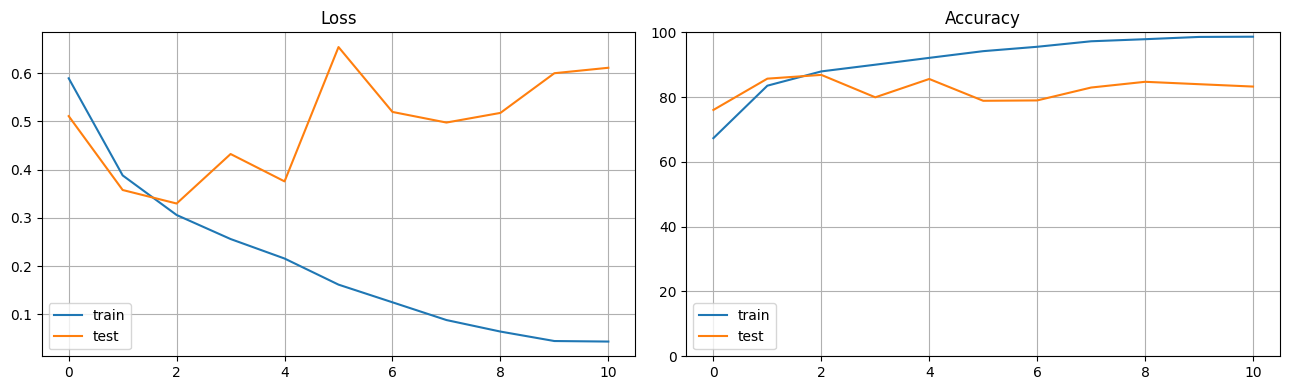

In [31]:
plot_history(history)

In [38]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8232 - loss: 0.5123
Model Simple_RNN Test accuracy:  0.8295999765396118


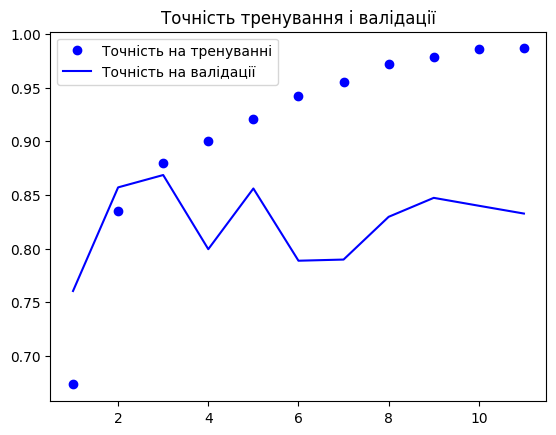

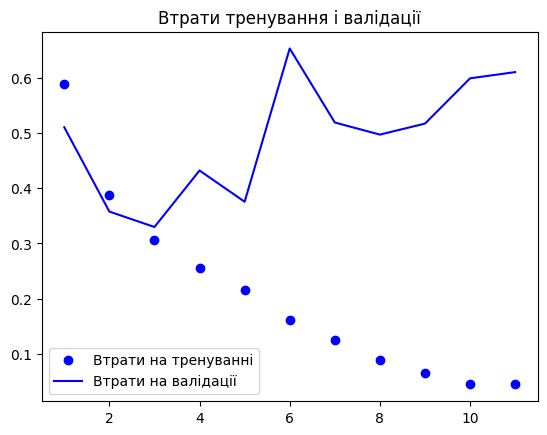

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Model GRU

In [41]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.GRU(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="GRU"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 63%|██████▎   | 19/30 [20:25<11:49, 64.52s/epoch, accuracy=0.986, loss=0.0475, val_accuracy=0.879, val_loss=0.449]


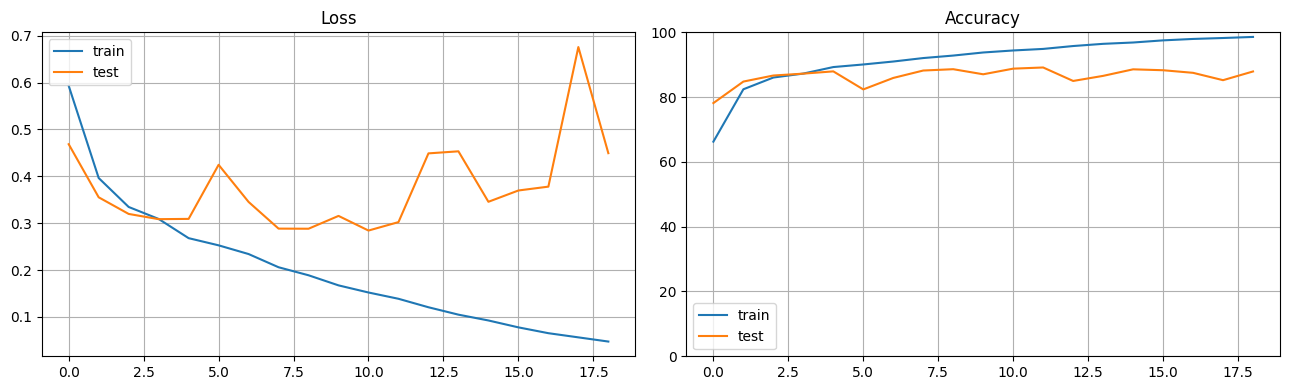

In [42]:
plot_history(history)

In [43]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8872 - loss: 0.2896
Model GRU Test accuracy:  0.8879200220108032


MODEL LSTM

In [44]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.LSTM(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="LSTM"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 53%|█████▎    | 16/30 [16:34<14:29, 62.13s/epoch, accuracy=0.963, loss=0.111, val_accuracy=0.847, val_loss=0.519]


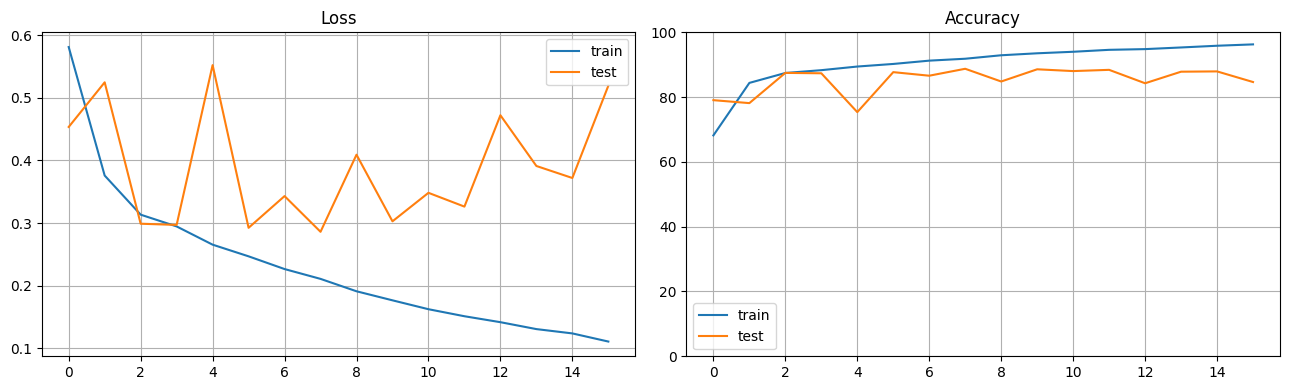

In [45]:
plot_history(history)

In [46]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8863 - loss: 0.2887
Model LSTM Test accuracy:  0.8875200152397156


MODEL BRNN (Bidirectional)

In [ ]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.Bidirectional(k.layers.LSTM(32)),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Bidirectional(LSTM)"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

In [ ]:
plot_history(history)

MODEL Deep RNN

In [ ]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.Bidirectional(k.layers.LSTM(32, return_sequences=True)),
        k.layers.Bidirectional(k.layers.LSTM(32)),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Deep(LSTM)"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

In [ ]:
plot_history(history)

In [ ]:
evaluate_model(model)